In [23]:
import re
import pandas as pd
import os
exportPath = r"C:/Users/Jonathan/OneDrive/Local/JVEM/Educacion/Master/Project/Data/Export"
files_data = os.listdir(exportPath)
powerdata_dfs = []
for fd in files_data:
    powerdata_dfs.append(pd.read_csv(f'{exportPath}/%s' % fd, delimiter=','))
power_df = pd.concat(powerdata_dfs, ignore_index = True)
power_df.t_stamp = pd.to_datetime(power_df.t_stamp)
power_df.set_index("t_stamp", inplace = True)
power_df = power_df.fillna(0)
power_df

,cfcfe6/g6actuatorout,cfcfe6/g6aparentpowerpmu,cfcfe6/g6avgcyltmp,cfcfe6/g6enginestop,cfcfe6/g6frequencyhzeu,cfcfe6/g6fueloilcomsum,cfcfe6/g6fueloilinflow,cfcfe6/g6fueloiloutflow,cfcfe6/g6hzcv,cfcfe6/g6kwsp,...,cfcfe6/g6te708,cfcfe6/g6te709,cfcfe6/g6te710,cfcfe6/g6te711,cfcfe6/g6te801eu,cfcfe6/g6te802eu,cfcfe6/g6te803eu,cfcfe6/g6te804eu,cfcfe6/g6te805eu,cfcfe6/g6failure
t_stamp,,,,,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00,45.627502,6482.000000,742.244019,0.0,0.000000,0.000000,0.000000,0.000000,33.117996,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.698029,0
2019-05-01 01:00:00,45.530619,6431.000000,743.098999,0.0,0.000000,0.000000,0.000000,0.000000,32.857689,0.000000,...,205.605011,208.821594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.650872,0
2019-05-01 02:00:00,45.466215,6429.000000,742.414978,0.0,0.000000,0.000000,0.000000,0.000000,32.265194,0.000000,...,205.716155,208.927762,203.669098,0.000000,0.000000,0.000000,0.000000,0.000000,156.611255,0
2019-05-01 03:00:00,45.426144,6479.000000,741.677063,0.0,0.000000,0.000000,0.000000,0.000000,32.116203,0.000000,...,205.806298,209.001206,203.785128,0.000000,0.000000,0.000000,0.000000,0.000000,156.571639,0
2019-05-01 04:00:00,45.489674,6456.000000,741.173035,0.0,0.000000,0.000000,0.000000,0.000000,31.694786,0.000000,...,205.896440,209.074651,203.846801,0.000000,0.000000,0.000000,0.000000,0.000000,156.532022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 19:00:00,3.300648,60.584697,42.875957,0.0,1.792378,8.700127,5.774698,6.542651,3.250390,6692.095175,...,-57156.334249,-57156.669460,-57151.735659,-57152.457843,81.781432,82.429878,92.331246,79.516619,82.513682,0
2021-11-30 20:00:00,3.305045,60.670391,42.891362,0.0,1.794913,8.712393,5.782684,6.551871,3.254988,6691.893668,...,-57153.848928,-57154.184612,-57149.249755,-57149.972949,81.782257,82.430873,92.331196,79.517630,82.514399,0
2021-11-30 21:00:00,3.309442,60.756084,42.906768,0.0,1.797448,8.724658,5.790670,6.561092,3.259586,6691.692160,...,-57151.363607,-57151.699764,-57146.763852,-57147.488056,81.783082,82.431868,92.331146,79.518642,82.515116,0


In [24]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22680 entries, 2019-05-01 00:00:00 to 2021-11-30 23:00:00
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cfcfe6/g6actuatorout       22680 non-null  float64
 1   cfcfe6/g6aparentpowerpmu   22680 non-null  float64
 2   cfcfe6/g6avgcyltmp         22680 non-null  float64
 3   cfcfe6/g6enginestop        22680 non-null  float64
 4   cfcfe6/g6frequencyhzeu     22680 non-null  float64
 5   cfcfe6/g6fueloilcomsum     22680 non-null  float64
 6   cfcfe6/g6fueloilinflow     22680 non-null  float64
 7   cfcfe6/g6fueloiloutflow    22680 non-null  float64
 8   cfcfe6/g6hzcv              22680 non-null  float64
 9   cfcfe6/g6kwsp              22680 non-null  float64
 10  cfcfe6/g6loadkweu          22680 non-null  float64
 11  cfcfe6/g6pf                22680 non-null  float64
 12  cfcfe6/g6pmuil1            22680 non-null  float64
 13  cfcfe6/g6pm

In [25]:
features_reference_df = pd.read_csv(r'C:/Users/Jonathan/OneDrive/Local/JVEM/Educacion/Master/Project/Data/Reference/features_reference.csv', delimiter=',')
features_reference = features_reference_df.set_index('tag')['feature'].to_dict()
features_reference

{'cfcfe6/g6te703': 'Main bearing 3 temp.',
 'cfcfe6/g6te401eu': 'HT-water temp. jacket inlet',
 'cfcfe6/g6tc51b': 'Exh. gas temp. cyl. B1',
 'cfcfe6/g6fueloilcomsum': 'Fuel oil consumption from flow rate',
 'cfcfe6/g6pressspmin': 'Receiver press. control, sp. min. limit',
 'cfcfe6/g6pt201eu': 'Lube oil inlet pressure',
 'cfcfe6/g6te704': 'Main bearing 4 temp.',
 'cfcfe6/g6te805eu': 'Gen. ND-end bearing temp.',
 'cfcfe6/g6frequencyhzeu': 'Generator frequency',
 'cfcfe6/g6tc56b': 'Exh. gas temp. cyl. B6',
 'cfcfe6/g6te521': 'Exhaust gas temp TC B inlet',
 'cfcfe6/g6te804eu': 'Gen. D-end bearing temp.',
 'cfcfe6/g6tc59a': 'Exh. gas temp. cyl. A9',
 'cfcfe6/g6pmuu23': 'Generator main voltage U23',
 'cfcfe6/g6fueloilinflow': 'Fuel oil inlet flow',
 'cfcfe6/g6st528eu': 'Turbo B speed',
 'cfcfe6/g6pt471eu': 'LT-water pressure CAC inlet',
 'cfcfe6/g6tc52b': 'Exh. gas temp. cyl. B2',
 'cfcfe6/g6tc58b': 'Exh. gas temp. cyl. B8',
 'cfcfe6/g6te709': 'Main bearing 9 temp.',
 'cfcfe6/g6te702': 'Main

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz
import altair as alt
import joblib

# Load the dataset
data = power_df

# Separate features and target
X = power_df.drop('cfcfe6/g6failure', axis=1)
y = power_df['cfcfe6/g6failure']
# Check for missing or infinite values in the data
missing_values = X.isna().sum().sum()
non_finite_values = (~np.isfinite(X)).sum().sum()
print(f"Missing values: {missing_values}")
print(f"Non-finite values: {non_finite_values}")

# Replace or drop missing/non-finite values if any
if missing_values > 0:
    X = X.fillna(X.mean())
if non_finite_values > 0:
    X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Missing values: 0
Non-finite values: 0


In [27]:
# Define the pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectKBest(score_func=f_classif, k=10)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'smote__sampling_strategy': [0.01, 0.3, 0.5],
    'smote__k_neighbors': [1, 3, 5],
    'clf__max_depth': list(range(1, 8)),
    'clf__n_estimators': np.unique(np.logspace(0, np.log10(80), num=5, dtype=int)).tolist()
}

# Initialize GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3 72] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('selector', SelectKBest()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=10)),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'clf__n_estimators': [1, 2, 8, 26, 79],
                         'smote__k_neighbors': [1, 3, 5],
                         'smote__sampling_strategy': [0.01, 0.3, 0.5]},
             scoring='f1')

Best max_depth: 6
Best n_estimators: 2
Best SMOTE sampling_strategy: 0.01
Best SMOTE k_neighbors: 3
Model saved to trained_random_forest_pipeline_model.pkl


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3 72] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4520
           1       0.04      0.81      0.07        16

    accuracy                           0.92      4536
   macro avg       0.52      0.87      0.51      4536
weighted avg       1.00      0.92      0.96      4536

F1 Score: 0.9560106013353119
Confusion Matrix:
[[4168  352]
 [   3   13]]


alt.Chart(...)

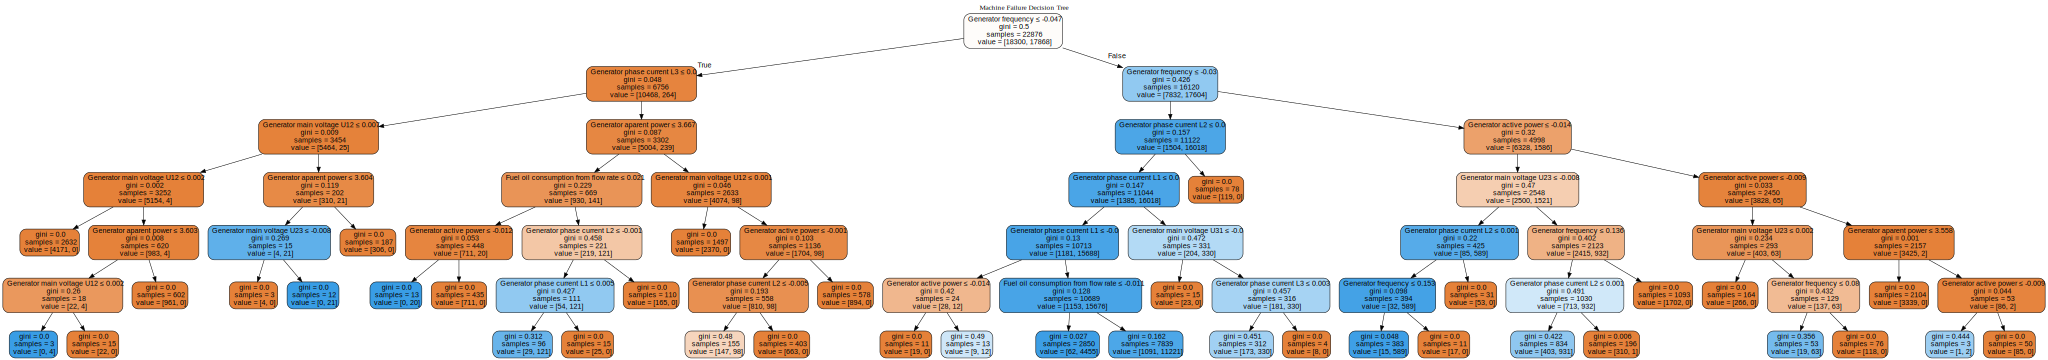

In [29]:
# Extract the best parameters from the grid search results
best_params = grid_search.best_params_
best_max_depth = best_params['clf__max_depth']
best_n_estimators = best_params['clf__n_estimators']
best_sampling_strategy = best_params['smote__sampling_strategy']
best_k_neighbors = best_params['smote__k_neighbors']

print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best SMOTE sampling_strategy:', best_sampling_strategy)
print('Best SMOTE k_neighbors:', best_k_neighbors)

# Update the pipeline with the best parameters and save the trained model
pipeline.set_params(clf__max_depth=best_max_depth, clf__n_estimators=best_n_estimators)

model_filename = 'trained_random_forest_pipeline_model.pkl'
feature_names_filename = 'feature_names.pkl'
joblib.dump(pipeline, model_filename)
joblib.dump(X_train.columns, feature_names_filename)
print(f"Model saved to {model_filename}")

# Function to evaluate a pipeline
def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return report, f1, cm

# Evaluate the best model on the test set
eval_report, eval_f1, eval_cm = evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test)
print(eval_report)
print('F1 Score:', eval_f1)
print('Confusion Matrix:')
print(eval_cm)

# Replace feature names with descriptions
def get_feature_description(feature_name):
    return features_reference.get(feature_name, feature_name)

# Plot feature importance using Altair
selected_features = X.columns[pipeline.named_steps['selector'].get_support()]
importances = pipeline.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]

importance_data = pd.DataFrame({
    'Feature': [get_feature_description(feature) for feature in selected_features[indices]],
    'Importance': importances[indices]
})

chart = alt.Chart(importance_data).mark_bar().encode(
    x='Importance',
    y=alt.Y('Feature', sort='-x')
).properties(
    title='Feature Importance'
)

display(chart)

# Show decision tree with selected features
# Visualize one of the trees from the Random Forest
estimator = pipeline.named_steps['clf'].estimators_[0]
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=[get_feature_description(feature) for feature in selected_features],
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=best_max_depth)

# Add a title to the DOT data
title = "Machine Failure Decision Tree"
dot_data = f"digraph Tree {{\nlabel=\"{title}\";\nlabelloc=t;\n{dot_data.split('digraph Tree {')[1]}"

# Display the decision tree within the notebook
graph = graphviz.Source(dot_data)
graph